# Exploring Downloaded Data
Simple notebook to load and inspect the NetCDF file

In [1]:
import xarray as xr
import pandas as pd

# Load the file
file_path = 'Data/test data sets/1_global_mean_co2_202201.nc'
data = xr.open_dataset(file_path)

# Print everything about the file
print(data)

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 1, latitude: 681, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-01-16T12:00:00
  * latitude   (latitude) float32 3kB -80.0 -79.75 -79.5 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
Data variables:
    spco2      (time, latitude, longitude) float32 4MB ...
Attributes:
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    institution:                   Mercator Ocean
    Conventions:                   CF-1.6
    area:                          GLOBAL
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
 

In [2]:
# See what variables are available
print("\nVariables in this file:")
print(list(data.data_vars))

# See the dimensions
print("\nDimensions:")
print(data.dims)

# See coordinate variables
print("\nCoordinates:")
print(list(data.coords))


Variables in this file:
['spco2']

Dimensions:
FrozenMappingWarningOnValuesAccess({'time': 1, 'latitude': 681, 'longitude': 1440})

Coordinates:
['latitude', 'longitude', 'time']


Plotting: spco2


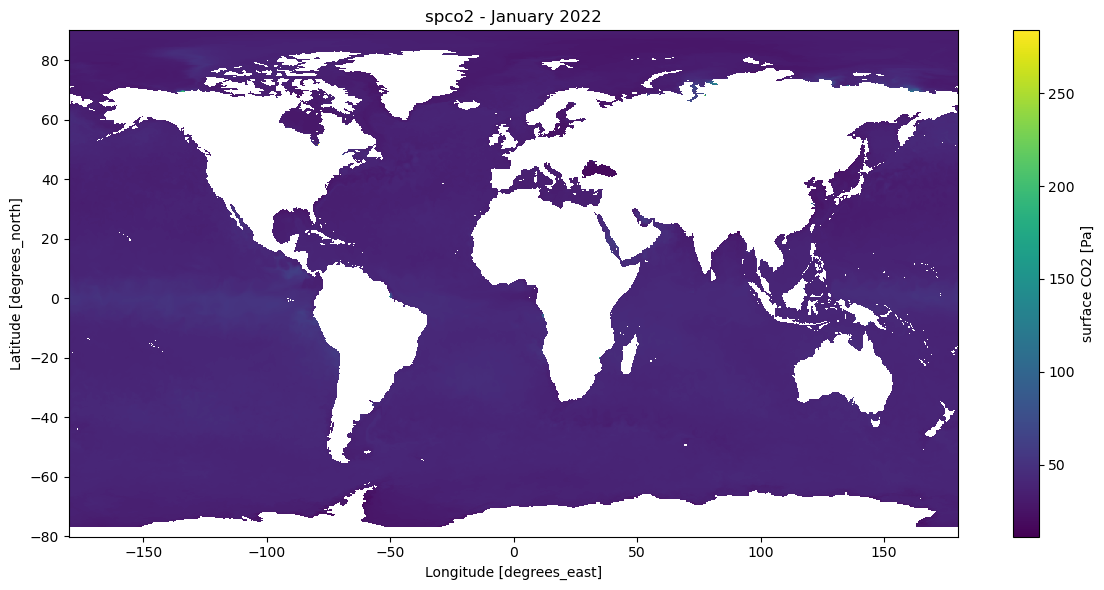

In [3]:
# Try to visualize the first variable
import matplotlib.pyplot as plt

# Get the first data variable
first_var = list(data.data_vars)[0]
print(f"Plotting: {first_var}")

data[first_var].plot(figsize=(12, 6))
plt.title(f'{first_var} - January 2022')
plt.tight_layout()
plt.show()

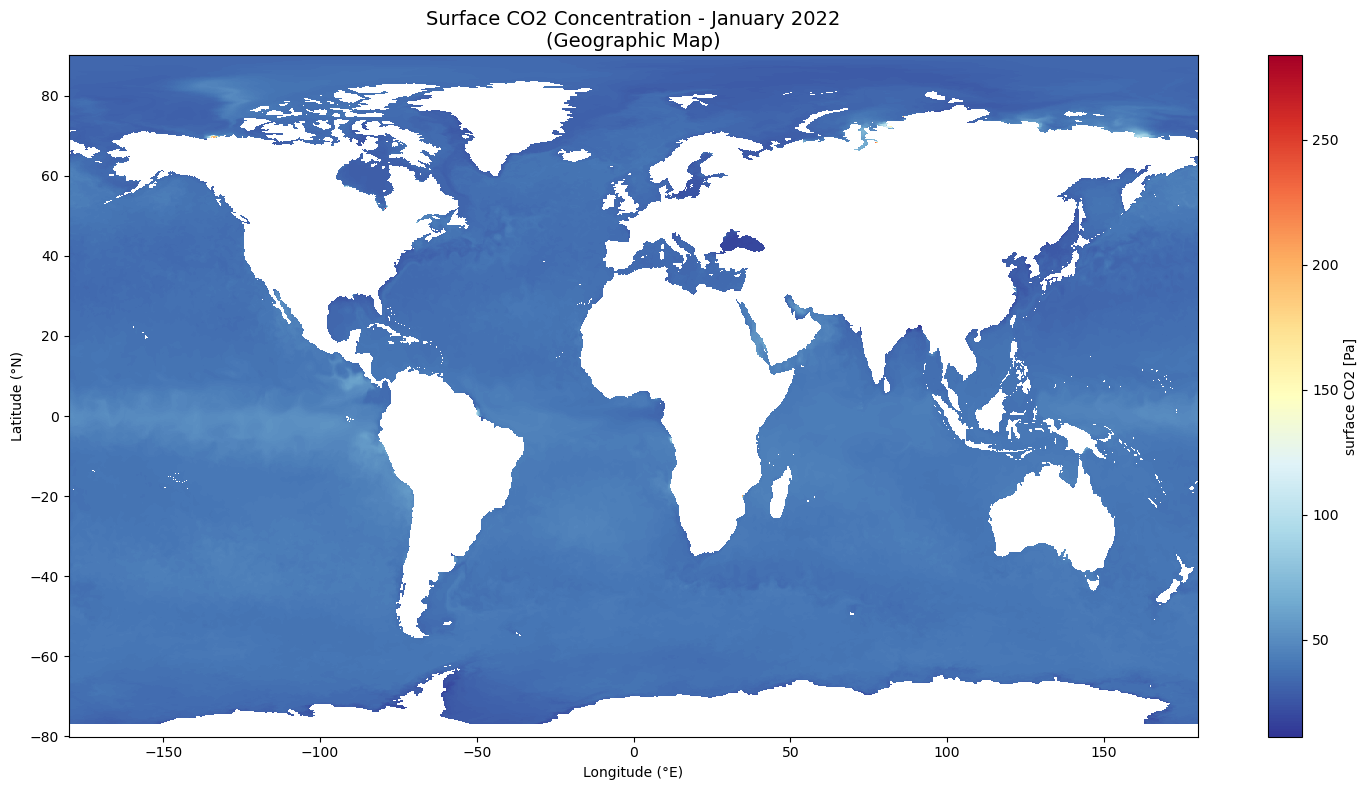

Min CO2: 11.27
Max CO2: 283.81
Mean CO2: 38.24


In [4]:
# Make a proper geographic map
import matplotlib.pyplot as plt

# Plot as a 2D map (latitude × longitude)
fig, ax = plt.subplots(figsize=(15, 8))

data['spco2'].plot(ax=ax, cmap='RdYlBu_r')
ax.set_title('Surface CO2 Concentration - January 2022\n(Geographic Map)', fontsize=14)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')

plt.tight_layout()
plt.show()

print(f"Min CO2: {data['spco2'].min().values:.2f}")
print(f"Max CO2: {data['spco2'].max().values:.2f}")
print(f"Mean CO2: {data['spco2'].mean().values:.2f}")

Data Statistics:
Min: 11.265114
Max: 283.805969
Range: 272.540863
Std Dev: 4.607780
Number of valid points: 682391

NaN values: 298249


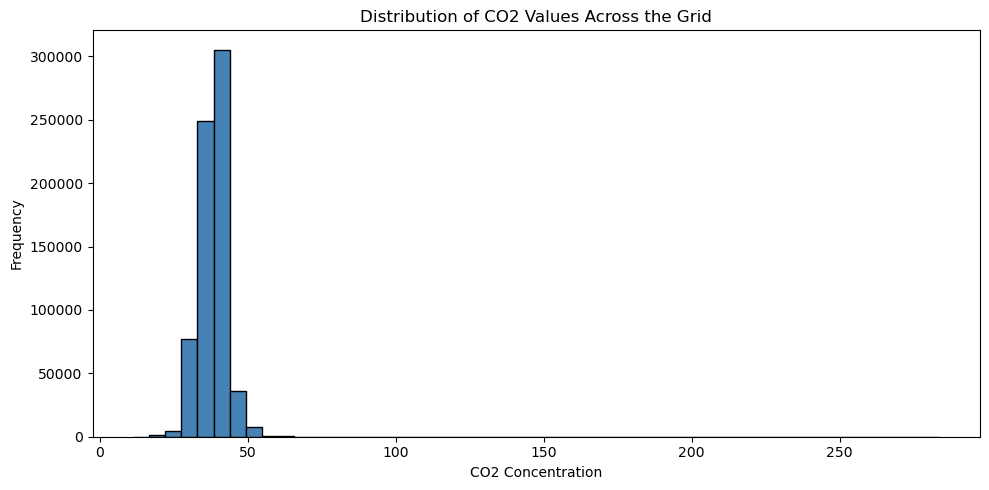

In [5]:
# Check the actual data range to understand the variation
import numpy as np

# Get statistics
co2_data = data['spco2'].values
print("Data Statistics:")
print(f"Min: {np.nanmin(co2_data):.6f}")
print(f"Max: {np.nanmax(co2_data):.6f}")
print(f"Range: {np.nanmax(co2_data) - np.nanmin(co2_data):.6f}")
print(f"Std Dev: {np.nanstd(co2_data):.6f}")
print(f"Number of valid points: {np.sum(~np.isnan(co2_data))}")

# Check for NaN values
print(f"\nNaN values: {np.sum(np.isnan(co2_data))}")

# Show a histogram
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(co2_data[~np.isnan(co2_data)], bins=50, color='steelblue', edgecolor='black')
ax.set_xlabel('CO2 Concentration')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of CO2 Values Across the Grid')
plt.tight_layout()
plt.show()

---
## Exploring the Carbonate Chemistry File
Now let's load the new file and see what variables it contains

In [6]:
# Load the carbonate chemistry file
car_file = 'Data/test data sets/1_global_mean_car_20220101.nc'
car_data = xr.open_dataset(car_file)

# Show what's inside
print("CARBONATE CHEMISTRY FILE CONTENTS:")
print("="*50)
print(car_data)
print("\n" + "="*50)
print("\nVariables available:")
print(list(car_data.data_vars))

CARBONATE CHEMISTRY FILE CONTENTS:
<xarray.Dataset> Size: 588MB
Dimensions:    (time: 1, depth: 50, latitude: 681, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-01-01T12:00:00
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 3kB -80.0 -79.75 -79.5 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
Data variables:
    ph         (time, depth, latitude, longitude) float32 196MB ...
    dissic     (time, depth, latitude, longitude) float32 196MB ...
    talk       (time, depth, latitude, longitude) float32 196MB ...
Attributes:
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         daily mean fields from Global Ocean Biogeo...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    c

pH variable structure:
<xarray.DataArray 'ph' (time: 1, depth: 50, latitude: 681, longitude: 1440)> Size: 196MB
[49032000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-01-01T12:00:00
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 3kB -80.0 -79.75 -79.5 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    long_name:      PH
    standard_name:  sea_water_ph_reported_on_total_scale
    units:          1
    unit_long:      1
    valid_min:      0.0
    valid_max:      5.0

Dimensions: ('time', 'depth', 'latitude', 'longitude')
Shape: (1, 50, 681, 1440)

Selected surface layer (depth=0)
After selection - Shape: (681, 1440)
After selection - Dims: ('latitude', 'longitude')


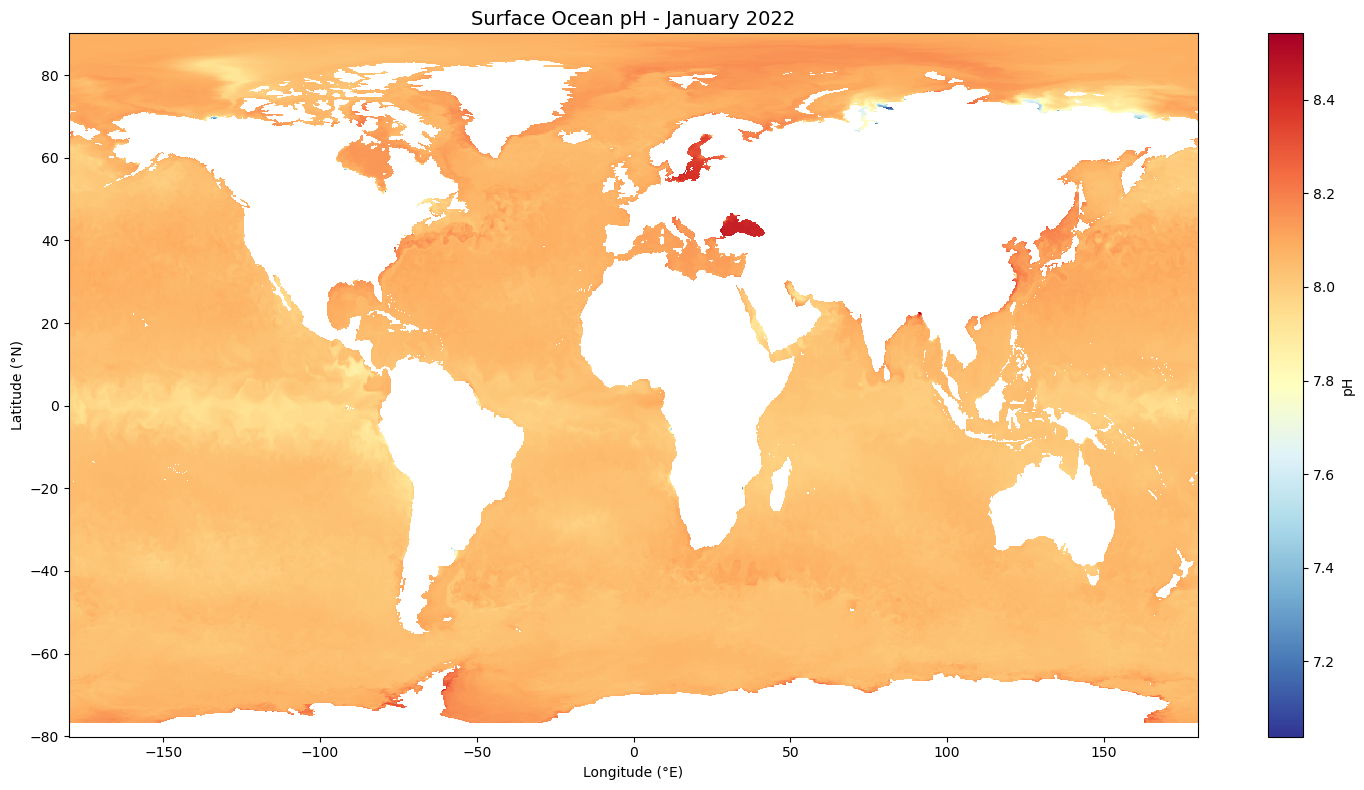


pH Statistics:
Min: 7.0393
Max: 8.5417
Range: 1.5024
Mean: 8.0158


In [11]:
# Check the structure first
print("pH variable structure:")
print(car_data['ph'])
print(f"\nDimensions: {car_data['ph'].dims}")
print(f"Shape: {car_data['ph'].shape}")

# Select SURFACE layer only (first depth level)
if 'depth' in car_data['ph'].dims:
    ph_data = car_data['ph'].isel(depth=0).squeeze()
    print("\nSelected surface layer (depth=0)")
elif 'time' in car_data['ph'].dims:
    ph_data = car_data['ph'].isel(time=0).squeeze()
    print("\nSelected first time step")
else:
    ph_data = car_data['ph'].squeeze()

print(f"After selection - Shape: {ph_data.shape}")
print(f"After selection - Dims: {ph_data.dims}")

# Get lat/lon coordinates
lats = car_data['latitude'].values
lons = car_data['longitude'].values

# Plot using matplotlib directly
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.pcolormesh(lons, lats, ph_data.values, cmap='RdYlBu_r', shading='auto')
plt.colorbar(im, ax=ax, label='pH')
ax.set_title('Surface Ocean pH - January 2022', fontsize=14)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
plt.tight_layout()
plt.show()

# Show statistics
print(f"\npH Statistics:")
print(f"Min: {ph_data.min().values:.4f}")
print(f"Max: {ph_data.max().values:.4f}")
print(f"Range: {ph_data.max().values - ph_data.min().values:.4f}")
print(f"Mean: {ph_data.mean().values:.4f}")

---
## Exploring the Sea Surface Temperature File
Now let's load the SST data and match it with pH

In [13]:
# Load the SST file
sst_file = 'Data/test data sets/1_SSTfnd-ODYSSEA-GLOB_.nc'
sst_data = xr.open_dataset(sst_file)

# Show what's inside
print("SST FILE CONTENTS:")
print("="*50)
print(sst_data)
print("\n" + "="*50)
print("\nVariables available:")
print(list(sst_data.data_vars))

SST FILE CONTENTS:
<xarray.Dataset> Size: 576MB
Dimensions:                           (time: 1, lat: 1600, lon: 3600)
Coordinates:
  * time                              (time) datetime64[ns] 8B 2022-01-01
  * lat                               (lat) float32 6kB -79.95 -79.85 ... 79.95
  * lon                               (lon) float32 14kB -179.9 -179.9 ... 179.9
Data variables: (12/15)
    crs                               int64 8B ...
    sea_surface_temperature           (time, lat, lon) float64 46MB ...
    or_number_of_pixels               (time, lat, lon) float32 23MB ...
    sea_surface_temperature_stddev    (time, lat, lon) float64 46MB ...
    quality_level                     (time, lat, lon) float32 23MB ...
    sses_bias                         (time, lat, lon) float64 46MB ...
    ...                                ...
    or_longitude                      (time, lat, lon) float64 46MB ...
    adjusted_sea_surface_temperature  (time, lat, lon) float64 46MB ...
    solar_ze

SST variable: sea_surface_temperature
Dimensions: ('time', 'lat', 'lon')
Shape: (1, 1600, 3600)

Converted from Kelvin to Celsius


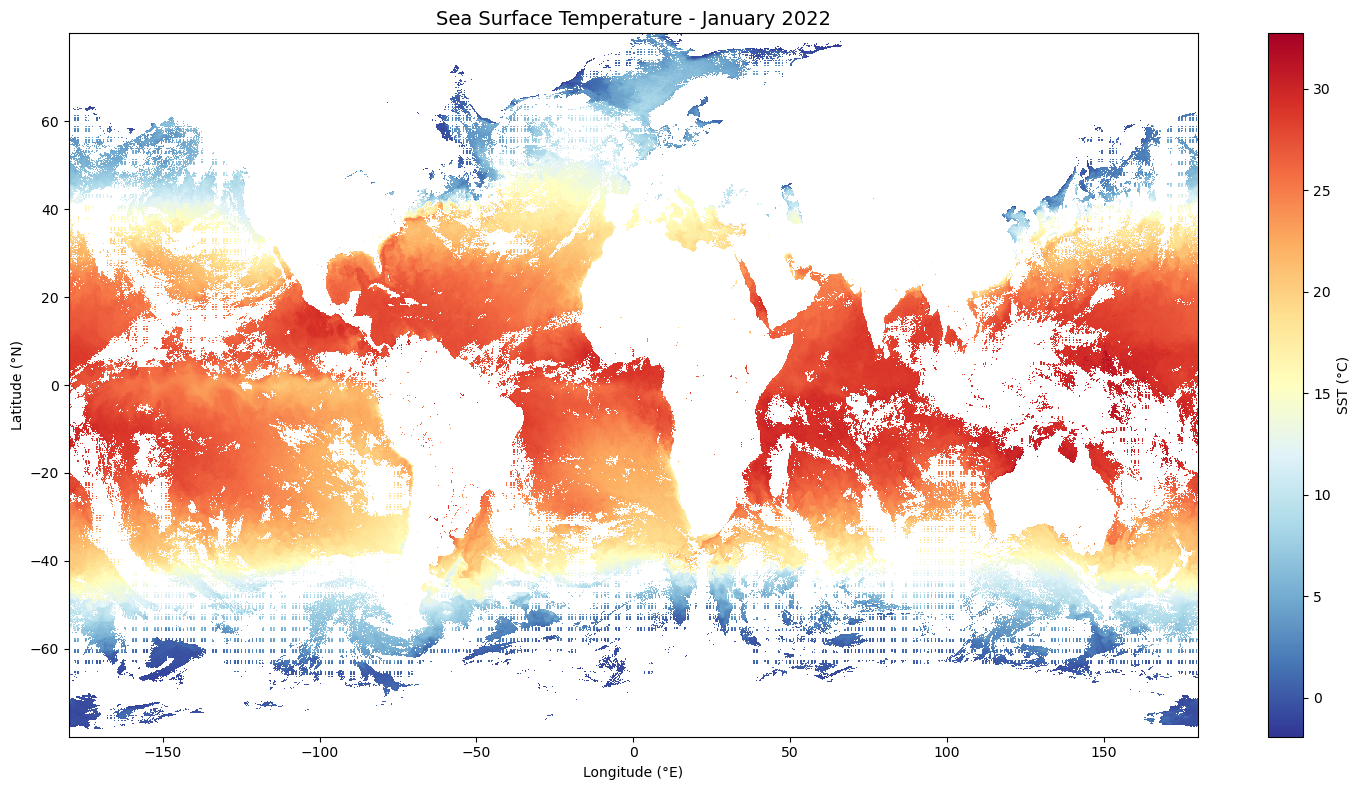


SST Statistics:
Min: -1.92°C
Max: 32.72°C
Mean: 19.63°C


In [14]:
# Extract and visualize SST
print("SST variable: sea_surface_temperature")
print(f"Dimensions: {sst_data['sea_surface_temperature'].dims}")
print(f"Shape: {sst_data['sea_surface_temperature'].shape}")

# Select surface (squeeze out time dimension)
sst = sst_data['sea_surface_temperature'].squeeze()

# Check units - convert Kelvin to Celsius if needed
if sst.max() > 200:  # Likely in Kelvin
    sst_celsius = sst - 273.15
    print("\nConverted from Kelvin to Celsius")
else:
    sst_celsius = sst
    print("\nAlready in Celsius")

# Plot SST
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.pcolormesh(sst_data['lon'].values, sst_data['lat'].values, 
                    sst_celsius.values, cmap='RdYlBu_r', shading='auto')
plt.colorbar(im, ax=ax, label='SST (°C)')
ax.set_title('Sea Surface Temperature - January 2022', fontsize=14)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
plt.tight_layout()
plt.show()

# Statistics
print(f"\nSST Statistics:")
print(f"Min: {sst_celsius.min().values:.2f}°C")
print(f"Max: {sst_celsius.max().values:.2f}°C")
print(f"Mean: {sst_celsius.mean().values:.2f}°C")